# Spotify Challenge - Clustering songs- Unsupervised Learning

🎯 The goal of this recap is to **cluster songs** using the **KMeans _(clustering algorithm)_** with a **PCA _(dimensionality reduction)_**

In [59]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample against a Normal distribution, 
# to see whether your sample is normally distributed or not

## (1) The Spotify Dataset

In [60]:
from sklearn.utils import shuffle

spotify = shuffle(pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv'))
spotify.head()

name                            artists  \
430                 Sitting in My Hotel                      ['The Kinks']   
1815            Only the Strong Survive                 ['REO Speedwagon']   
1723                    Donna / Hashish  ['Galt MacDermot', 'Tom Pierson']   
6977                      Music is mine                        ['Nujabes']   
1617  Men 2nd - 2006 Remastered Version                           ['Wire']   

      popularity  danceability  valence  energy  explicit  key  liveness  \
430           23         0.380    0.270   0.259         0    5    0.1130   
1815          21         0.567    0.962   0.866         0    0    0.0664   
1723          36         0.429    0.510   0.590         0    5    0.6470   
6977          44         0.672    0.503   0.767         0    6    0.3560   
1617          24         0.503    0.857   0.722         0    2    0.2970   

      loudness  speechiness    tempo  
430    -13.128       0.0402  145.871  
1815   -11.227       0.0398  130.195  
1723   -11.450       0.0757  147.530  
6977    -6.845       0.0546  105.987  
1617    -7.555       0.0293  112.960

### (1.1) Basic Info

In [61]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 430 to 3575
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10000 non-null  object 
 1   artists       10000 non-null  object 
 2   popularity    10000 non-null  int64  
 3   danceability  10000 non-null  float64
 4   valence       10000 non-null  float64
 5   energy        10000 non-null  float64
 6   explicit      10000 non-null  int64  
 7   key           10000 non-null  int64  
 8   liveness      10000 non-null  float64
 9   loudness      10000 non-null  float64
 10  speechiness   10000 non-null  float64
 11  tempo         10000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1015.6+ KB


### (1.2) Working on the numerical features

🔢  Let's focus on the numerical features. Store the numerical features in a variable called `spotify_num`

In [62]:
spotify_num = spotify.select_dtypes(include=['int64', 'float64'])

In [36]:
spotify_num

popularity  danceability  valence  energy  explicit  key  liveness  \
8111          44         0.789   0.7170   0.820         1    6    0.0873   
9654          62         0.546   0.3640   0.586         1    6    0.0562   
8485          53         0.714   0.7230   0.654         1    5    0.0895   
8057          43         0.704   0.6780   0.806         0    0    0.0977   
3586          29         0.784   0.7570   0.944         0    2    0.2340   
...          ...           ...      ...     ...       ...  ...       ...   
2250          22         0.400   0.0372   0.931         0    3    0.9290   
5366          36         0.325   0.8400   0.911         0    5    0.1670   
5628          32         0.710   0.7170   0.452         0    4    0.0970   
899           20         0.416   0.6450   0.621         0    5    0.0611   
7306          39         0.363   0.8940   0.582         0    7    0.4570   

      loudness  speechiness    tempo  
8111    -3.844       0.3340  160.040  
9654    -8.488       0.0313  131.778  
8485    -6.868       0.3160  150.991  
8057    -3.866       0.1210  130.006  
3586    -6.579       0.0505  116.058  
...        ...          ...      ...  
2250   -10.307       0.9080   84.547  
5366    -7.152       0.1230  168.282  
5628    -9.269       0.2460  182.918  
899    -11.669       0.0464  134.747  
7306    -6.698       0.0286  101.681  

[10000 rows x 10 columns]

### (1.3) Correlations between features

❓ Visualize the correlation matrix (`PuRd` is a nice cmap choice)

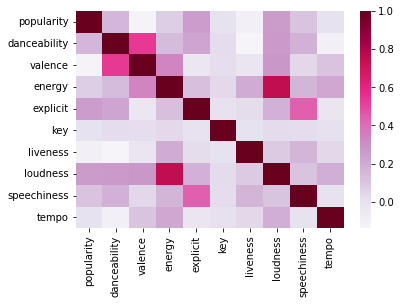

In [29]:
sns.heatmap(spotify.corr(), cmap='PuRd');

### (1.4) 3D Visualisation

🎨 Let's select 3 features of these songs and visualise them in a 3D-scatter-plot using `plotly` (📚 [plotly.express.scatter_3d](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d))

In [63]:
fig = px.scatter_3d(spotify_num, 
                    x = 'danceability',
                    y = 'energy',
                    z = 'speechiness',
                    opacity=0.7, width=500, height=500
           )
fig.show()

🎯 _Remember: our goal is to cluster these songs_

## (2) Unsupervised Learning: Clustering

### (2.1) Vanilla KMeans

💫 Let's try our first _Unsupervised Algorithm_ 

❓ Fit a `kmeans_vanilla` model directly on our `spotify_num`, keeping default number of clusters
- Store its predicted labels in a variable called `labels_vanilla`

In [64]:
from sklearn.cluster import KMeans

# Fit K-means
kmeans_vanilla = KMeans()
kmeans_vanilla.fit(spotify_num)
labels_vanilla = kmeans_vanilla.labels_

In [65]:
fig = px.scatter_3d(spotify_num, 
                    x = 'danceability',
                    y = 'energy',
                    z = 'speechiness',
                    color = labels_vanilla, width=500, height=500)
fig.show()

😭 It doesn't look good at all... who would pay 10-15 euros a month to Spotify, Apple Music, Deezer, Amazon Music or Tidal for that ?

### (2.2) Scaling + KMeans

🪜 Remember that the KMeans is a distance-based algorithm and that for any Machine Learning model, we should scale the features so that they start with an "equal chance" of impacting the predictions.

❓ Let's take a short approach to scaling and Robust-Scale everything. 

In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
spotify_scaled = pd.DataFrame(scaler.fit_transform(spotify_num), columns=spotify_num.columns)
spotify_scaled

popularity  danceability   valence    energy  explicit       key  \
0       0.421053      0.924303  0.448718  0.527132       1.0  0.142857   
1       1.368421     -0.043825 -0.374126 -0.077519       1.0  0.142857   
2       0.894737      0.625498  0.462704  0.098191       1.0  0.000000   
3       0.368421      0.585657  0.357809  0.490956       0.0 -0.714286   
4      -0.368421      0.904382  0.541958  0.847545       0.0 -0.428571   
...          ...           ...       ...       ...       ...       ...   
9995   -0.736842     -0.625498 -1.135897  0.813953       0.0 -0.285714   
9996    0.000000     -0.924303  0.735431  0.762274       0.0  0.000000   
9997   -0.210526      0.609562  0.448718 -0.423773       0.0 -0.142857   
9998   -0.842105     -0.561753  0.280886  0.012920       0.0  0.000000   
9999    0.157895     -0.772908  0.861305 -0.087855       0.0  0.285714   

      liveness  loudness  speechiness     tempo  
0    -0.249178  0.783558     6.687500  0.960644  
1    -0.435016  0.043655    -0.319444  0.309720  
2    -0.236032  0.301761     6.270833  0.752230  
3    -0.187033  0.780053     1.756944  0.268908  
4     0.627428  0.347805     0.125000 -0.052340  
...        ...       ...          ...       ...  
9995  4.780400 -0.246156    19.974537 -0.778094  
9996  0.227069  0.256512     1.803241  1.150472  
9997 -0.191216 -0.080778     4.650463  1.487566  
9998 -0.405736 -0.463156     0.030093  0.378101  
9999  1.959964  0.328846    -0.381944 -0.383468  

[10000 rows x 10 columns]

❓ Fit the same default KMeans model number and compare results visually

In [53]:
kmeans_scaled = KMeans()
kmeans_scaled.fit(spotify_scaled)

KMeans()

In [50]:
labels_scaled = kmeans_scaled.labels_
labels_scaled

array([1, 6, 1, ..., 4, 2, 7], dtype=int32)

In [56]:
spotify_num

popularity  danceability  valence  energy  explicit  key  liveness  \
8111          44         0.789   0.7170   0.820         1    6    0.0873   
9654          62         0.546   0.3640   0.586         1    6    0.0562   
8485          53         0.714   0.7230   0.654         1    5    0.0895   
8057          43         0.704   0.6780   0.806         0    0    0.0977   
3586          29         0.784   0.7570   0.944         0    2    0.2340   
...          ...           ...      ...     ...       ...  ...       ...   
2250          22         0.400   0.0372   0.931         0    3    0.9290   
5366          36         0.325   0.8400   0.911         0    5    0.1670   
5628          32         0.710   0.7170   0.452         0    4    0.0970   
899           20         0.416   0.6450   0.621         0    5    0.0611   
7306          39         0.363   0.8940   0.582         0    7    0.4570   

      loudness  speechiness    tempo  
8111    -3.844       0.3340  160.040  
9654    -8.488       0.0313  131.778  
8485    -6.868       0.3160  150.991  
8057    -3.866       0.1210  130.006  
3586    -6.579       0.0505  116.058  
...        ...          ...      ...  
2250   -10.307       0.9080   84.547  
5366    -7.152       0.1230  168.282  
5628    -9.269       0.2460  182.918  
899    -11.669       0.0464  134.747  
7306    -6.698       0.0286  101.681  

[10000 rows x 10 columns]

🧪Okay, our songs'clustering look better even if we can't rival yet with the datascience team at Spotify!

In [66]:
fig_scaled = px.scatter_3d(spotify_scaled,
                           x = 'danceability',
                           y = 'energy',
                           z = 'speechiness',
                           color = labels_scaled,
                           width=500, height=500)
fig_scaled.show()

🤪 It is a bit better but still messy...besides, we are only looking at one specific 3D slice of our dataset here!

### (2.3) Scaling + PCA + KMeans

🧑🏻‍🏫 What if we perform a PCA before running our clustering algorithm ? We could:
* reduce dimensionality to get a better visual feedback on our clustering
* use the orthogonality of the principal components so that the KMeans algorithm increases its clustering power

❓ Fit a PCA and reduce the dimensionality appropriately using the elbow method

In [70]:
pca = PCA(n_components=3).fit(spotify_scaled)

❓ Project your $ 10000 \times 10$ `spotify_num_scaled` dataset into this new space with the number of principal components you decided to keep. Name it `spotify_proj`

In [112]:
spotify_proj = pca.transform(spotify_scaled)

In [73]:
spotify_proj.shape

(10000, 3)

In [74]:
spotify_scaled.shape

(10000, 10)

In [76]:
fig_scaled = px.scatter_3d(spotify_proj, x = 0, y = 1, z = 2, opacity=0.7, width=500, height=500, color = labels_scaled)
fig_scaled.show()

❓ Let's try a KMeans now and save the labels into `labels_kmeans_pca`

In [77]:
kmeans_pca = KMeans()
kmeans_pca.fit(spotify_proj)
labels_kmeans_pca = kmeans_pca.labels_

In [78]:
fig_scaled = px.scatter_3d(spotify_scaled,
                           x = 'danceability',
                           y = 'energy',
                           z = 'speechiness',
                           color = labels_kmeans_pca,
                          width=500, height=500)
fig_scaled.show()

### (2.4) Ideal number of clusters ? 

<details>
    <summary><i>Are there some number of clusters useless to try ? </i></summary>

* $K = 1$ means that you would have only 1 cluster with the whole dataset of $10000$ songs
* $K = 10000$ means that each of the $10000$ songs would be its own cluster!
* $K = 2$ means that you would have only 2 clusters with $5000$ songs each...
    
        
</details>        

In [79]:
nb_clusters_to_try = np.arange(1,20+1,1)
nb_clusters_to_try

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

❓ How would you decide on the number of clusters to use ❓

<details>
    <summary markdown='span'>Answer</summary>

Compare each model's inertia:
    
= Sum of Squared Residuals of each observation to their closest centroids  
= Sum of Within-Cluster Sum of Squares (WCSS)

$ inertia = \sum_{j=1}^{K} \sum_{x_i \in C_j} || x_i - \mu_j ||^2$

where:
* $K$ = number of clusters
* $C_j$ = cluster $j$
</details>

In [80]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(spotify_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


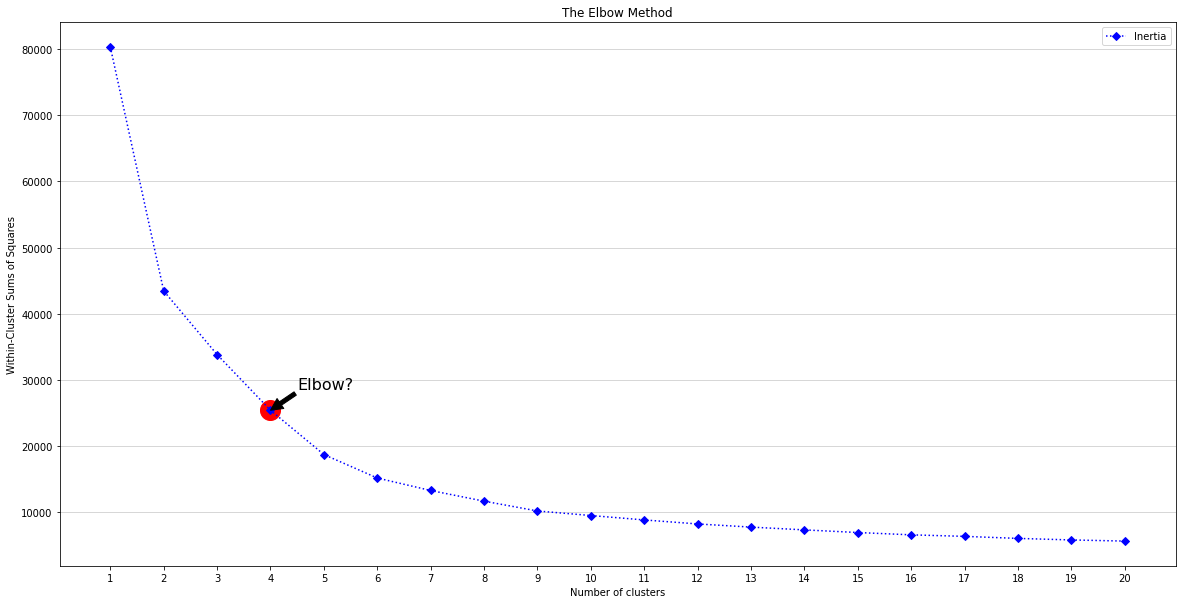

In [81]:
elbow_highlight = 4
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

### (2.5) Spotify : 6 daily mixes

🎵 If you are a Spotify user, you may have noticed that they offer you 6 daily mixes... So even if your previous elbow was not located at $K = 6$, let's try this value as the number of clusters!

In [111]:
spotify_clusters = 6

print('Working with ' + str(spotify_clusters) + ' clusters as in Spotify', flush=True)
print("-"*80)

kmeans = KMeans(n_clusters = spotify_clusters, max_iter = 300)

kmeans.fit(spotify_proj)

labelling = kmeans.labels_

fig_scaled = px.scatter_3d(spotify_proj,
                           x = 0,
                           y = 1,
                           z = 2,
                           color=labelling, 
                           width=500, 
                           height=500)
fig_scaled.show()

Working with 6 clusters as in Spotify
--------------------------------------------------------------------------------


TypeError: float() argument must be a string or a number, not 'RobustScaler'

In [90]:
spotify_labelled = pd.concat([spotify,pd.Series(labelling)],axis=1).rename(columns={0:"label"})
spotify_labelled

name  \
0                 We're For The Dark - Remastered 2010   
1                          Sixty Years On - Piano Demo   
2                              Got to Find Another Way   
3     Feelin' Alright - Live At The Fillmore East/1970   
4                                     Caravan - Take 7   
...                                                ...   
9995                                             China   
9996                       Halloweenie III: Seven Days   
9997                                               AYA   
9998                                          Darkness   
9999                   Billetes Azules (with J Balvin)   

                                                artists  popularity  \
0                                         ['Badfinger']          22   
1                                        ['Elton John']          25   
2                                     ['The Guess Who']          21   
3                                        ['Joe Cocker']          22   
4                                      ['Van Morrison']          23   
...                                                 ...         ...   
9995  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...          72   
9996                                       ['Ashnikko']          68   
9997                                        ['MAMAMOO']          76   
9998                                         ['Eminem']          70   
9999                              ['KEVVO', 'J Balvin']          74   

      danceability  valence  energy  explicit  key  liveness  loudness  \
0            0.678    0.559   0.432         0    3    0.0727   -12.696   
1            0.456    0.259   0.368         0    6    0.1560   -10.692   
2            0.433    0.833   0.724         0    0    0.1700    -9.803   
3            0.436    0.870   0.914         0    5    0.8550    -6.955   
4            0.669    0.564   0.412         0    7    0.4010   -13.095   
...            ...      ...     ...       ...  ...       ...       ...   
9995         0.786    0.608   0.808         0    7    0.0822    -3.702   
9996         0.717    0.734   0.753         0    7    0.1010    -6.020   
9997         0.634    0.637   0.858         0    4    0.2580    -2.226   
9998         0.671    0.195   0.623         1    2    0.6430    -7.161   
9999         0.856    0.642   0.721         1    7    0.1820    -4.928   

      speechiness    tempo  label  
0          0.0334  117.674      4  
1          0.0280  143.783      5  
2          0.0378   84.341      4  
3          0.0610  174.005      1  
4          0.0679   78.716      5  
...           ...      ...    ...  
9995       0.0881  105.029      2  
9996       0.0605  137.936      1  
9997       0.0809   91.688      1  
9998       0.3080   75.055      5  
9999       0.1080   94.991      3  

[10000 rows x 13 columns]

In [91]:
np.unique(labelling)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [92]:
spotify_labelled.label.value_counts()

5    5496
0    2058
1     988
3     820
4     578
2      60
Name: label, dtype: int64

In [93]:
daily_mixes = {}

for numero_cluster in np.unique(labelling):
    daily_mixes[numero_cluster] = spotify_labelled[spotify_labelled.label == numero_cluster]

In [94]:
for key,value in daily_mixes.items():
    print("-"*50)
    print(f"Here are some songs for the playlist number {key}")
    print("-"*50)
    display(value.sample(20))

--------------------------------------------------
Here are some songs for the playlist number 0
--------------------------------------------------


name  \
2664                                       Any Old Time   
1090                        Aguirre I (l'acrime di rei)   
8726  I'm Free (Heaven Helps the Man) - From "Footlo...   
9318                                        Stand Still   
2052  Don't You Want Me - Extended Dance Mix / 2012 ...   
6090                                            La Pava   
8743                                 Man in the Sixties   
610                            The Wonderful Soup Stone   
9875                        CUT EM IN (feat. Rick Ross)   
3116                                  Second Hand Heart   
2519                           Under Stars - Remastered   
6955                                     Je pense à toi   
8037                                      Jesus Messiah   
7241                                    Into The Hollow   
7244  A Song Dedicated to the Memory of Stormy the R...   
375                                        Me And Jesus   
7542                                Long Forgotten Sons   
2261  Gypsy - Live at the Forum, Los Angeles, CA Oct...   
8554                                            Elevate   
7306                          Workin' On A Groovy Thing   

                              artists  popularity  danceability  valence  \
2664                ['George Strait']          23         0.707   0.5720   
1090                    ['Popol Vuh']          26         0.179   0.0581   
8726                ['Kenny Loggins']          46         0.585   0.8140   
9318              ['Sabrina Claudio']          58         0.476   0.1610   
2052             ['The Human League']          34         0.756   0.7030   
6090            ['Montez de Durango']          39         0.706   0.9960   
8743                        ['Balue']          49         0.394   0.7360   
610                      ['Dr. Hook']          30         0.610   0.6610   
9875  ['Anderson .Paak', 'Rick Ross']          67         0.744   0.8130   
3116           ['Bobby "Blue" Bland']          22         0.657   0.6090   
2519                    ['Brian Eno']          29         0.340   0.1820   
6955              ['Amadou & Mariam']          44         0.678   0.8550   
8037                 ['Chris Tomlin']          44         0.293   0.3690   
7241      ['Queens of the Stone Age']          40         0.440   0.6260   
7244                          ['AJJ']          41         0.679   0.8450   
375                   ['Tom T. Hall']          21         0.548   0.9400   
7542                 ['Rise Against']          47         0.474   0.4600   
2261                ['Fleetwood Mac']          27         0.448   0.6100   
8554                    ['St. Lucia']          49         0.541   0.7220   
7306                   ['Patti Drew']          39         0.363   0.8940   

      energy  explicit  key  liveness  loudness  speechiness    tempo  label  
2664  0.4960         0    7    0.2700   -14.981       0.0589  104.323      0  
1090  0.1530         0    7    0.1310   -18.968       0.0363  168.845      0  
8726  0.8070         0    8    0.2700    -6.308       0.0390  160.253      0  
9318  0.4400         0    9    0.0773    -8.198       0.0371  149.389      0  
2052  0.6120         0    0    0.0201   -10.366       0.0593  117.606      0  
6090  0.7920         0    9    0.1040    -2.851       0.0752  154.779      0  
8743  0.8420         0    2    0.2680    -5.391       0.0363  183.520      0  
610   0.4570         0    0    0.2680   -12.722       0.0380  104.313      0  
9875  0.7770         1    0    0.7670    -5.577       0.3530  158.052      0  
3116  0.5560         0    7    0.1370   -10.795       0.0927  149.760      0  
2519  0.0535         0    8    0.0840   -28.505       0.0714   69.896      0  
6955  0.4230         0   11    0.1510   -10.223       0.0265  106.346      0  
8037  0.7430         0   11    0.1070    -6.061       0.0310  165.861      0  
7241  0.9330         0    2    0.0712    -4.796       0.0388  102.980      0  
7244  0.3330         0    9  

--------------------------------------------------
Here are some songs for the playlist number 1
--------------------------------------------------


name  \
392                                        Amor... Amar   
4928                            Me Asusta Pero Me Gusta   
8340                                        Double Take   
1704                  Baba O'Riley - Live At Shepperton   
8180      So Gone [What My Mind Says] - feat. Paul Wall   
6906  Sugar (Gimme Some) [feat. Ludacris, Lil Kim, a...   
1734                                       Spanish Girl   
3319                                      Le ''Ça ira''   
2271                           Perdido en Mi Habitación   
4911                              Does My Breath Smell?   
7537           Royal Flush (feat. André 3000 & Raekwon)   
528                  Yo No Quiero Piedras En Mi Caminoe   
7333                                    No Jesus Christ   
8169                    Blow Me Away - Featuring Valora   
1985                                   Me Acuerdo De Ti   
3041                                     I Want My Girl   
6981                            It Feels Like Christmas   
2865                                    Tokyo, Oklahoma   
7505                                 N Luv Wit My Money   
772                                 Good Morning Friend   

                                   artists  popularity  danceability  valence  \
392                       ['Camilo Sesto']          35         0.325   0.2440   
4928                       ['Ana Bárbara']          39         0.836   0.5720   
8340                       ['Austin Moon']          45         0.708   0.8860   
1704                           ['The Who']          27         0.304   0.4120   
8180           ['Jill Scott', 'Paul Wall']          43         0.746   0.4660   
6906                       ['Trick Daddy']          40         0.813   0.9110   
1734                    ['Julio Iglesias']          29         0.689   0.7690   
3319                        ['Édith Piaf']          28         0.590   0.8230   
2271                            ['Mecano']          43         0.714   0.9390   
4911                         ['blink-182']          36         0.369   0.7190   
7537  ['Big Boi', 'André 3000', 'Raekwon']          39         0.719   0.7040   
528      ['Ismael Rivera Y Sus Cachimbos']          27         0.630   0.9540   
7333                           ['Seether']          42         0.441   0.0963   
8169       ['Breaking Benjamin', 'Valora']          44         0.535   0.5160   
1985                       ['Los Felinos']          22         0.759   0.8050   
3041                     ['Jesse Johnson']          20         0.738   0.6440   
6981        ['Ghost of Christmas Present']          40         0.363   0.5170   
2865                     ['John Anderson']          22         0.704   0.9340   
7505       ['Paull Wall & Chamillionaire']          39         0.596   0.7800   
772                        ['Johnny Cash']          23         0.548   0.8340   

      energy  explicit  key  liveness  loudness  speechiness    tempo  label  
392    0.500         0    9    0.0821    -7.923       0.0341   80.771      1  
4928   0.594         0    4    0.0513   -12.286       0.0494   94.171      1  
8340   0.897         0    6    0.1410    -5.216       0.0466  130.064      1  
1704   0.835         0    5    0.8570    -7.372       0.0662  114.621      1  
8180   0.500         0    7    0.1940    -8.426       0.0669  120.039      1  
6906   0.687         0    4    0.1460    -5.620       0.1840  120.023      1  
1734   0.395         0    4    0.2570   -14.566       0.0366  120.553      1  
3319   0.741         0    3    0.6590    -4.755       0.4320  124.102      1  
2271   0.916         0    9    0.2650    -5.062       0.0378  123.057      1  
4911   0.839         0    0    0.0625    -8.095       0.0765   81.369      1  
7537   0.671         1   11    0.1330    -6.881       0.4040   94.983      1  
528    0.770         0    7    0.0835    -7.234       0.1330  106.733      1  
7333   0.790         0    8    0.0987    -5.546       0.0358  144.980      1  
816

--------------------------------------------------
Here are some songs for the playlist number 2
--------------------------------------------------


name  \
2533                                       Razor's Edge   
3232                                      Queen In Love   
6730                          Beautiful Disaster - Live   
5898                                           Qué Rico   
1722                                          Movin' On   
7690                                          Boneyards   
2928                                           Cut Dead   
81                             A Very Special Love Song   
8893                         Battle Against A True Hero   
1029                                       Unutama Beni   
9061                                   I'll Be The Moon   
410   Water Music Suite - Water Music Suite in G Maj...   
8706                                                3AM   
283                          Prince Kajuku - Remastered   
3003                                        Stone Woman   
6142                                       Secret Lover   
792   Down To Seeds And Stems Again Blues - Live (19...   
991     Good Lovin' Gone Bad - Alternate Vocal & Guitar   
531                       Legend Of The One-Eyed Sailor   
7169                           When a Man Loves a Woman   

                                                artists  popularity  \
2533                                      ['Meat Loaf']          31   
3232                               ['Yngwie Malmsteen']          31   
6730                                 ['Kelly Clarkson']          37   
5898                          ['Los Amigos Invisibles']          49   
1722                                        ['Triumph']          23   
7690                                  ['Parkway Drive']          45   
2928                       ['The Jesus and Mary Chain']          21   
81                                     ['Charlie Rich']          20   
8893                                       ['Toby Fox']          55   
1029                                        ['Esmeray']          52   
9061                 ['Dierks Bentley', 'Maren Morris']          51   
410   ['George Frideric Handel', 'Academy of St. Mar...          29   
8706                                            ['AJR']          47   
283                                             ['UFO']          28   
3003                                    ['Bryan Ferry']          33   
6142                             ['The Isley Brothers']          36   
792       ['Commander Cody and His Lost Planet Airmen']          17   
991                                     ['Bad Company']          22   
531                                  ['Chuck Mangione']          24   
7169                                 ['Michael Bolton']          54   

      danceability  valence  energy  explicit  key  liveness  loudness  \
2533         0.706    0.772   0.865         0    4    0.1230    -9.032   
3232         0.477    0.439   0.774         0    3    0.0905   -13.215   
6730         0.466    0.238   0.226         0    7    0.9560    -8.913   
5898         0.710    0.922   0.659         0    5    0.0945    -8.390   
1722         0.575    0.562   0.905         0    0    0.4410    -4.197   
7690         0.158    0.272   0.947         0    1    0.2310    -4.006   
2928         0.464    0.391   0.319         0    7    0.0898   -18.417   
81           0.402    0.313   0.410         0    7    0.1320    -8.464   
8893         0.456    0.734   0.955         0    5    0.1490   -10.112   
1029         0.629    0.308   0.278         0    3    0.3390    -9.224   
9061         0.551    0.428   0.549         0    2    0.1050    -8.343   
410          0.690    0.676   0.158         0    7    0.1430   -22.659   
8706         0.515    0.332   0.428         0    4    0.1070   -11.088   
283          0.320    0.775   0.418         0    2    0.1060    -6.414   
3003         0.785    0.885   0.805         0    9    0.4900    -7.168   
6142         0.640    0.902   0.617         0    1    0.3230    -4.616   
792          0.280    0.496   0.322         0    0    0.9430 

--------------------------------------------------
Here are some songs for the playlist number 3
--------------------------------------------------


name  \
978                         In A Hand Or A Face   
2288                                 Jan's Song   
8042                                  Interlude   
5875                               Kicking Cars   
3306                                  About You   
4993                                Run Runaway   
3070                              Street Lethal   
7168                                   Sleepers   
9028                                   lit(var)   
9918                               Not Friendly   
225   People Get Ready - Live @ Bitter End, NYC   
6778                     Play Something We Know   
7543               Pervert Pop Song (Castígame)   
2610               This Is One Of Those Moments   
4459                             Cascos Ligeros   
9452                              Today - Intro   
3624                                    Contigo   
9938                                   Nepenthe   
3804                 Visions from the Dark Side   
9527                                   Original   

                              artists  popularity  danceability  valence  \
978                       ['The Who']          19         0.398   0.4040   
2288                         ['INXS']          21         0.573   0.6900   
8042       ['Lil Wayne', 'Tech N9ne']          42         0.665   0.5320   
5875                     ['Panchiko']          38         0.309   0.3640   
3306     ['The Jesus and Mary Chain']          32         0.582   0.2520   
4993                ['Great Big Sea']          33         0.475   0.8030   
3070      ['Racer X', 'Paul Gilbert']          30         0.296   0.0964   
7168                       ['Saosin']          43         0.282   0.3370   
9028                ['Kensuke Ushio']          57         0.329   0.0338   
9918                    ['Flo Milli']          64         0.878   0.6560   
225               ['Curtis Mayfield']          27         0.622   0.6410   
6778  ['Adam Hood', 'Justin Johnson']          36         0.386   0.5110   
7543              ['Plastilina Mosh']          58         0.794   0.6820   
2610             ['Barbra Streisand']          28         0.242   0.1180   
4459                   ['Liberación']          33         0.779   0.8690   
9452                       ['DaBaby']          57         0.915   0.6190   
3624               ['Cano Estremera']          27         0.714   0.8950   
9938              ['Clyde Boudreaux']          70         0.133   0.0495   
3804                 ['Morbid Angel']          31         0.236   0.3930   
9527        ['Arcangel', 'Bad Bunny']          63         0.798   0.2920   

       energy  explicit  key  liveness  loudness  speechiness    tempo  label  
978   0.77700         0    7    0.1370    -7.012       0.0497  128.428      3  
2288  0.61500         0    6    0.3310   -14.150       0.0507  134.623      3  
8042  0.90500         1   10    0.2090    -4.224       0.2670  130.864      3  
5875  0.86100         0    7    0.3580    -4.935       0.0653   83.829      3  
3306  0.41400         0    9    0.1320    -8.892       0.0269  105.656      3  
4993  0.84000         0    7    0.1590    -7.323       0.0480  158.006      3  
3070  0.93000         0    6    0.2240   -10.422       0.0914  135.989      3  
7168  0.97700         0    2    0.3440    -3.723       0.0715  183.916      3  
9028  0.25800         0    1    0.1050   -16.147       0.0615   95.328      3  
9918  0.79300         1    1    0.0934    -4.744       0.1880  139.990      3  
225   0.41200         0   11    0.6760   -12.459       0.2050  137.409      3  
6778  0.63900         0    9    0.1920    -6.094       0.0306  173.104      3  
7543  0.82800         0    2    0.2090    -5.339       0.0781  130.087      3  
2610  0.31100         0    2    0.0869   -14.532       0.0389   73.383      3  
4459  0.74700         0    0    0.1890    -6.685       0.0489   99.111      3  
9452  0.51100         1    6    0.0752    -7.482       0.3230  140.036      3  
3624  0.62400 

--------------------------------------------------
Here are some songs for the playlist number 4
--------------------------------------------------


name  \
3898  Things That Make You Go Hmmmm.... (feat. Freed...   
7208                                       The Deep End   
1918                                 The Jumping Master   
5849                                Another Dumb Blonde   
1189                                         Sweet Lucy   
7110                                   Without You Here   
7000                                         Voodoo Too   
3185                                        I'm A Rebel   
8060                                      The Poop Song   
8423                                      American Girl   
9683                                           Dead Mom   
8870                             You're On (feat. Kyan)   
9036                         Clear - Shawn Wasabi Remix   
25                                      My Brother Jake   
5947                                   Here in My Heart   
8985                                      Converse High   
5841  El Dorado - From "The Road To El Dorado" Sound...   
1075                                          Blue Mist   
7651                                    Nobody to Blame   
8605                                             Voices   

                                                artists  popularity  \
3898        ['C & C Music Factory', 'Freedom Williams']          33   
7208                        ['Scary Kids Scaring Kids']          40   
1918                                    ['Mikey Dread']          27   
5849                                           ['Hoku']          33   
1189  ['Michael Hurley', 'Unholy Modal Rounders', 'J...          22   
7110                              ['The Goo Goo Dolls']          48   
7000                                       ['Godsmack']          41   
3185                                         ['Accept']          41   
8060                       ['The Toilet Bowl Cleaners']          46   
8423                                   ['Bonnie McKee']          49   
9683  ['Sophia Anne Caruso', 'Beetlejuice Original B...          61   
8870                                 ['Madeon', 'Kyan']          54   
9036              ['Pusher', 'Mothica', 'Shawn Wasabi']          58   
25                                             ['Free']          34   
5947                                       ['Plus One']          49   
8985                                            ['BTS']          57   
5841                                     ['Elton John']          39   
1075                                   ["Mama's Pride"]          20   
7651                                   ['Cody Johnson']          40   
8605                               ['Sturgill Simpson']          46   

      danceability  valence  energy  explicit  key  liveness  loudness  \
3898         0.810    0.969   0.930         0    1    0.3570    -7.464   
7208         0.378    0.409   0.950         0    8    0.3290    -4.220   
1918         0.796    0.840   0.734         0    8    0.1550    -6.840   
5849         0.688    0.551   0.940         0    1    0.0800    -4.759   
1189         0.731    0.729   0.466         0    2    0.0810   -13.049   
7110         0.494    0.040   0.712         0    5    0.3620    -5.438   
7000         0.636    0.720   0.731         0    0    0.2900    -9.124   
3185         0.490    0.495   0.789         0    4    0.3250   -12.775   
8060         0.799    0.434   0.178         0    0    0.1700   -12.762   
8423         0.660    0.660   0.816         0    0    0.5900    -4.332   
9683         0.528    0.247   0.477         0    2    0.0965    -6.552   
8870         0.490    0.241   0.914         0   10    0.7930    -3.202   
9036         0.790    0.403   0.939         0    6    0.6360    -1.802   
25           0.694    0.730   0.561         0    4    0.4180   -10.117   
5947         0.633    0.380   0.614         0    9    0.1500    -7.282   
8985         0.724    0.815   0.794         0    1    0.2010    -3.982   
5841         0.638    0.449   0.876         0    0    0.1290 

--------------------------------------------------
Here are some songs for the playlist number 5
--------------------------------------------------


name  \
6004                              Qué Pena   
8873                                Ballin   
9882                       Ojos De Maniaco   
5828                     Like a Real Freak   
4871                      Born With A Tail   
8935                         Saint Cecilia   
4091                      Dead Man's Party   
1324                               Jugando   
5959                           Inner Smile   
5440                    Stairway To Heaven   
2687                 I'll Take Care Of You   
2828                Dancing on a High Wire   
1323                      Rhapsody in Blue   
6690  Take Me to the River - 2003 Remaster   
7359           Casting Agents and Cowgirls   
1944                               Strings   
8300                        Nuclear Family   
1              Sixty Years On - Piano Demo   
4612                        Rain Will Fall   
1121                       Prelude To Love   

                                                artists  popularity  \
6004  ['La Combinación Vallenata', 'Jean Carlos Cent...          54   
8873                                   ['Lil Uzi Vert']          50   
9882                           ['LEGADO 7', 'Junior H']          68   
5828                                       ['R. Kelly']          35   
4871                                   ['Supersuckers']          36   
8935                                   ['Foo Fighters']          58   
4091                                   ['Oingo Boingo']          36   
1324                                        ['Santana']          27   
5959                                          ['Texas']          51   
5440  ['London Philharmonic Orchestra', 'Peter Schol...          38   
2687                                  ['Ronnie Milsap']          31   
2828                       ['The Alan Parsons Project']          33   
1323                                  ['Walter Murphy']          27   
6690                                  ['Talking Heads']          40   
7359                                      ['Busdriver']          41   
1944                                   ['Kenny Rankin']          27   
8300                                      ['Green Day']          52   
1                                        ['Elton John']          25   
4612                                 ['I Mother Earth']          37   
1121                                   ['Donna Summer']          30   

      danceability  valence  energy  explicit  key  liveness  loudness  \
6004         0.782   0.8830  0.6400         0    5    0.1500    -5.417   
8873         0.603   0.3700  0.7700         1    1    0.1120    -5.840   
9882         0.795   0.9340  0.5850         0    8    0.1120    -4.451   
5828         0.710   0.5600  0.6820         0    9    0.0843    -6.728   
4871         0.389   0.2260  0.9890         0    9    0.2190    -3.999   
8935         0.235   0.5130  0.8690         0    4    0.4590    -4.284   
4091         0.565   0.8960  0.7690         0    1    0.0667   -10.443   
1324         0.336   0.3540  0.9750         0    2    0.7640    -7.614   
5959         0.576   0.6520  0.8410         0    0    0.1150    -5.717   
5440         0.146   0.0369  0.0957         0    9    0.0601   -20.822   
2687         0.500   0.1450  0.2510         0    0    0.1380   -12.767   
2828         0.789   0.5290  0.6200         0    2    0.0803   -11.140   
1323         0.616   0.4900  0.5570         0   10    0.1280    -9.598   
6690         0.651   0.8620  0.4460         0    6    0.0580    -9.571   
7359         0.678   0.5680  0.7410         0    7    0.5190    -4.634   
1944         0.604   0.3110  0.2380         0    2    0.1240   -16.267   
8300         0.437   0.6250  0.9880         0    4    0.5990    -3.174   
1            0.456   0.2590  0.3680         0    6    0.1560   -10.692   
4612         0.526   0.3920  0.9650         0   11    0.2790    -5.697   
1121         0.645   0.4230  0.1190         0    1    0.0978   -22.221   

      speechiness    tem

### (2.6) Pipeling the labelling process

❓ Wrap the three steps Scaling, PCA and KMeans in one pipeline called `pipeline_spotify`. Fit it and store the predicted labels into a variable called `labels`

In [106]:
from sklearn.pipeline import make_pipeline

pipeline_spotify = make_pipeline(RobustScaler(), 
                                 PCA(n_components=3),
                                 KMeans(n_clusters = spotify_clusters, max_iter = 300))

In [115]:
fig = px.scatter_3d(spotify_proj,
                           x = 0, 
                           y = 1,
                           z = 2,
                           color = labels)
fig.show()

In [113]:
pipeline_spotify.fit(spotify_num)
labels = pipeline_spotify.predict(spotify_num)

In [114]:
spotify_proj

array([[ 5.91300238, -1.11653333, -1.33332672],
       [-1.1375283 , -0.78912077, -0.61104968],
       [ 5.45003321, -1.24681725, -0.78689339],
       ...,
       [ 3.70835898, -1.04048824, -0.27955811],
       [-0.97018109, -0.62200178,  0.13976125],
       [-1.06349357,  1.67331517, -0.08563653]])

## (4) Tensorflow Projector 

You can use [projector.tensorflow.org](https://projector.tensorflow.org/) to visualize your data in nicer 3D plots
It also allows you to try several other clustering techniques, such as
- PCA
- T-SNE
- UMAP

<img src="https://github.com/lewagon/data-images/blob/master/ML/ML_tsne_umap.png?raw=true" alt="ttsne" width="700" height="700">

In [ ]:
# To upload data, convert them first as tsv format, then click on "load" directly from the website
spotify_scaled.head(3000).to_csv('spotify.csv', index=False, header=False, sep='\t')
pd.DataFrame(labels).head(3000).to_csv('our_labels.csv', index=False, header=False, sep='\t')

❓ Upload your spotify dataset and vizualize the **PCA** and the **UMAP** version. 
- Also upload your "custom labels" determined previously, and "color by labels".
- Does your "labels" made from PCA look interesting in the UMAP too ?

## (Optional) Bibliography

**Theoretical explanations of these best 2D/3D dimensionality reduction techniques**
- 📺 [T-SNE: clearly explained (StatsQuest)](https://www.youtube.com/watch?v=NEaUSP4YerM&t=14s)
- 📺 [UMAP: clearly explained (StatsQuest)](https://www.youtube.com/watch?v=eN0wFzBA4Sc)

**Spotify resources for projects**
- 📺 [Audio Analysis theory with the Spotify Web API](https://www.youtube.com/watch?v=goUzHd7cTuA)
- 🤖 Spotify API [docs](https://developer.spotify.com/documentation/web-api/)
- 🤖 Spotify API Wrappers [Tekore](https://github.com/felix-hilden/tekore) and [Spotipy](https://github.com/plamere/spotipy)